# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [313]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [314]:
# reading the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [315]:
# Finding number of rows and columns in data

rows = df.shape[0]
columns = df.shape[1]
print(rows)
print(columns)

1898
9


#### Observations: 

There are 1898 rows and 9 columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [316]:
# Summary of datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* Columns (order id, customer id, food prep time and deliver time) are of numerical integer type.
* The cost of order column is of numerical float type.
* Columns (restaurant name, cuisine type, day of week and rating) are of object type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [317]:
# CHecking for missing values in data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [318]:
# Statiscal summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

* The minimum time taken for food to be prepared once an order is place  is  20.00 mins.
* The average time taken for food to be prepared once an order is place  is  27.37 mins.
* The maximum time taken for food to be prepared once an order is place  is  35.00 mins.

### **Question 5:** How many orders are not rated?

In [319]:
# Finding the counts of each rating category

df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

### Order ID

In [320]:
# Finding the number of unique Order IDs
df['order_id'].nunique()  

1898

#### Observations:
There are 1898 unique orders

### Customer ID

In [321]:
# Finding the number of unique customer IDs 
df['customer_id'].nunique() 

1200

#### Observations:
There are 1200 seperate customers who made orders

### Restaurant name

In [322]:
# Finding the number of unique restaurants
df['restaurant_name'].nunique() 

178

#### Observations:
The orders came from 178 different restaurants.

### Cuisine type

In [323]:
# Finding the number of unique cuisines
df['cuisine_type'].nunique() 

14

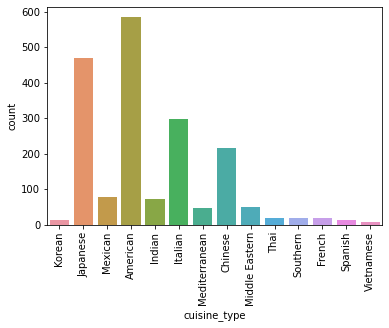

In [324]:
# Countplot for the type of cuisine
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
* Orders were from 14 different cuisines.
* American cuisine is most popular, followed by Japanese cuisine
* Vietnamese cuisine is the least popular

### Rating

In [325]:
# Finding the number of rating categories
df['rating'].nunique()

4

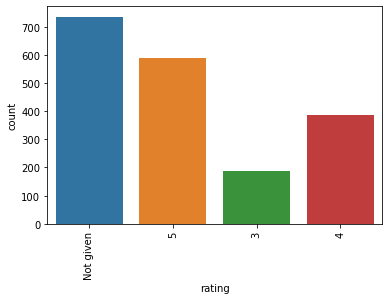

In [326]:
# countplot for ratings
sns.countplot(data=df,x='rating')
plt.xticks(rotation=90)
plt.show()

#### Observations:
* Most of the orders were not rated
* None of the orders received a rating of 0 to 2
* A rating of 5 was the most common rating.

### Cost of the order

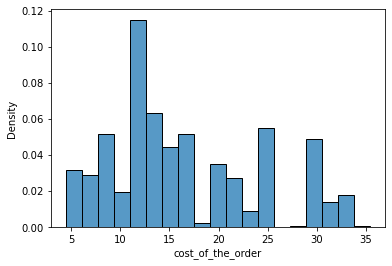

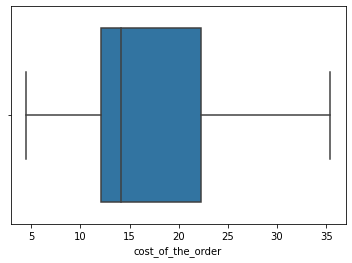

In [327]:
# Creating a density histogram for the cost of orders
sns.histplot(data=df,x='cost_of_the_order',stat='density')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations:
* The distribution is skewed towards right.
* There are no outliers
* The median cost of orders was around 14 dollars


### Food Preparation time

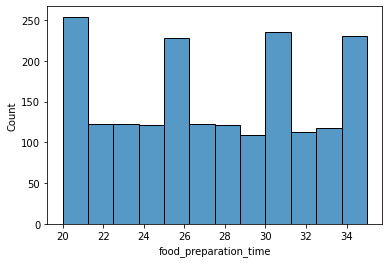

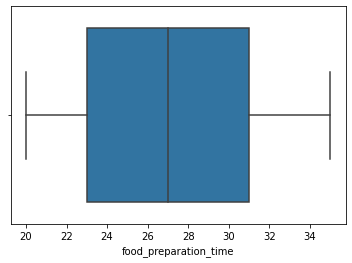

In [328]:
# Creating a histogram for the food prep time
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:
* The distribution is symmetric
* There are no outliers

### Delivery time

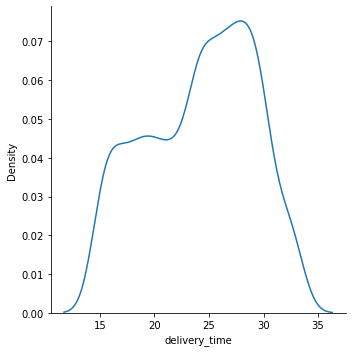

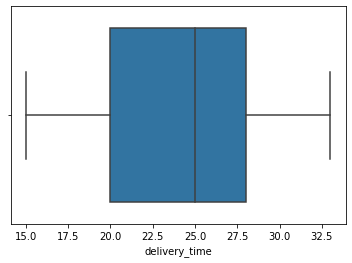

In [329]:
# Creating a distrubtion plot for the delivery time
sns.displot(data=df,x='delivery_time',kind='kde')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()


#### Observations:
* The distribution is skewed to the left
* The median delivery time was about 25 mins
* There are no outliers

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [330]:
# Finding the 5 most popular restaurants
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:

The top 5 restaurants with the most number of orders received are : 
* Shake Shack ,   The Meatball Shop , Blue Ribbon Sushi,  Blue Ribbon Fried Chicken,    Parm 

### **Question 8**: Which is the most popular cuisine on weekends?

In [331]:
# Creating a dataframe to rows which are only on weekends
df_wkend = df[df['day_of_the_week'] == 'Weekend']

# Finding the numer of orders for each cuisine on weekends
df_wkend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
The most Popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [332]:
# Creating a dataframe to rows which have orders costing more than 20 dollars
dfAbove20 = df[df['cost_of_the_order']>20]

# Finding the % of orders more than 20 dollars
percentage = (dfAbove20.shape[0] / df.shape[0]) * 100
percentage

29.24130663856691

#### Observations:
29.24 percent of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time?

In [333]:
# finding mean order delviery time
mean = df['delivery_time'].mean()
mean

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [334]:
# Finding the number of orders made by each customer, sorted from highest orders first
dfTop3 = df['customer_id'].value_counts().head(3)
dfTop3

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Top 3 most frequent customer IDs and their corresponding number of orders are:
* ID 52832 ,  13 orders
* ID 47440 ,  10 orders
* ID 83287 ,  9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Correlation among variables


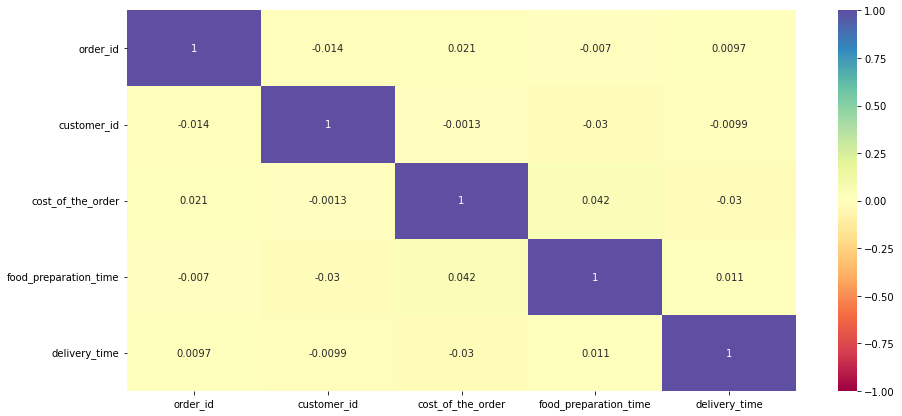

In [335]:
# Plotting a heatmap for the variables
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:
None of the numerical variables seem to have some sort of correlation

#### Cuisine vs Cost of the order

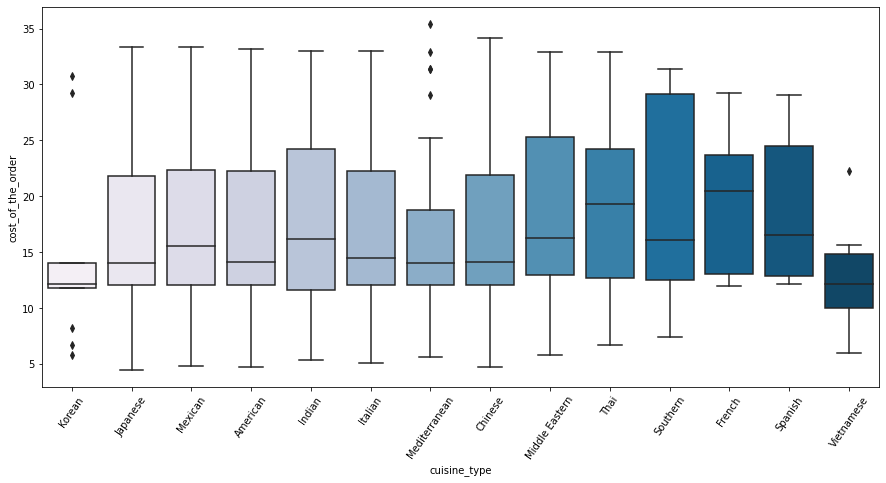

In [336]:
# Boxplot for cuisine type vs order cost
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 55)
plt.show()

#### Observations:
* French cuisine has the highest median cost while Korean cuisine has the lowest median cost
* Many cost outliers were observed for Korean and Mediterranean cuisines
* Orders for Vietnamese cuisine were generally cheaper

#### Cuisine vs Food Preparation time

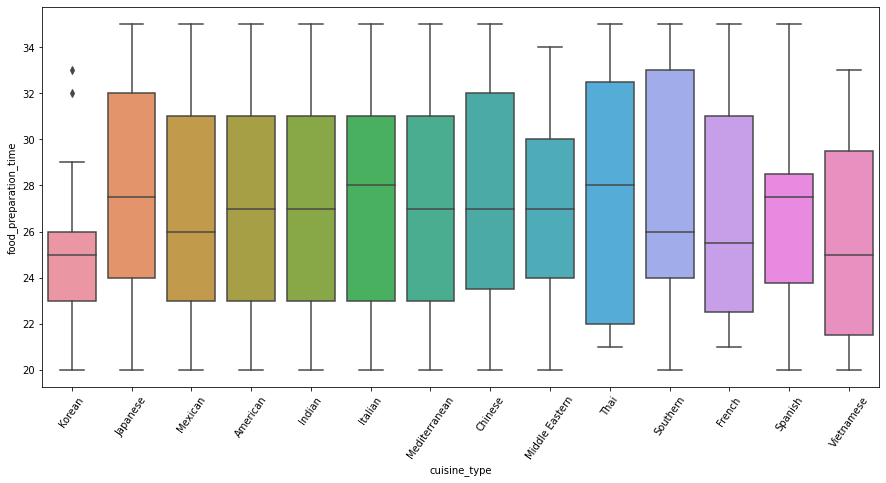

In [337]:
# Boxplot for cuisine type vs food prep time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 55)
plt.show()

#### Observations:
* The median time taken to prepare most types of cuisine is around 26-28 mins
* Only a few korean cuisine orders took around 32-33 mins to be prepared
* The range of food prep time for most types of cuisine orders lies between 23 to 31 mins

#### Day of the Week vs Delivery time

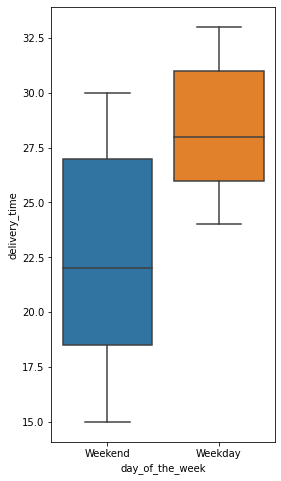

In [338]:
# Box plot for Day of week vs delivery time
plt.figure(figsize=(4,8))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)  
plt.show()

#### Observations:
* The delivery time during weekdays is generally higher than during weekends

#### Rating vs Delivery time

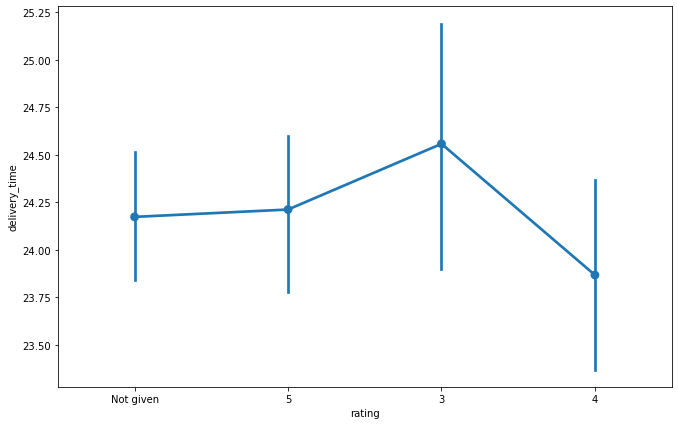

In [339]:
# Pointplot for rating vs delivery time
plt.figure(figsize=(11, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:
COmparing 4 and 5 ratings, the longer dlivery times seemed to have a higher raing BUT this is in contrast when comparing 3 and 4 ratings, whereby the longer delivery times seemed to have a lower rating.

#### Rating vs Food preparation time

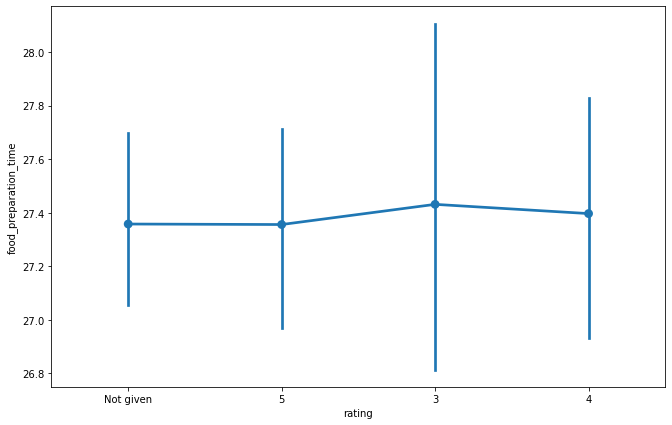

In [340]:
# Pointplot for rating vs food prep time
plt.figure(figsize=(11, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:
There seemes to be no relation between rating and food prep time.The median prep time for all ratings was around 27.4 mins which produced different ratings.

#### Rating vs Cost of the order

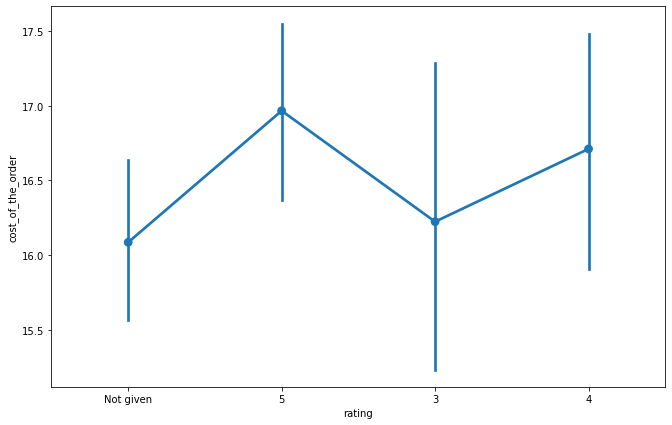

In [341]:
# Pointplot for rating vs order cost
plt.figure(figsize=(11, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations:
The higher the cost of the order, the higher the rating received

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [342]:
# Dropping orders which have no rating from the dataframe
df_rated = df[df['rating'] != 'Not given'].copy()

# converting ratings type from object to integer
df_rated['rating'] = df_rated['rating'].astype('int64')  

# creating a dataframe with restaurants and their rating counts, sorted from highest number to lower number of ratings
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


#### Observations:
* 4  restaurants have rating count of more than 50.
* They are :  Shake Shack , THe Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [343]:
# Function for finding the revenue for each order

def revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return 0

# Finding the revenue for each order and storing it into a new columnn, Revenue    
df['Revenue'] = df['cost_of_the_order'].apply(revenue) 

# Finding the sum of all revenues and rouding it off to 2 decimal places
Total_Revenue = df['Revenue'].sum()
Total_Revenue = round(Total_Revenue, 2)
Total_Revenue

6166.3

#### Observations:
The net revenue generated is 6166.30 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [344]:
# Adding the food prep time and delivery time to get the total time taken and storing it in a new column, totaltime
df['totaltime'] = df['food_preparation_time'] + df['delivery_time']

# Finding the number of orders which took longer than 60 mins total time
count = df[df['totaltime'] > 60].shape[0] 

# finding the % of orders which took more than 60 mins total time
percentage = (count / df.shape[0]) * 100
percentage


10.537407797681771

#### Observations:
10.54 % of orders take more than 60 mins to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [345]:
# Finding the mean delivery time for weekends    
mean_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean() 
print(mean_weekend)

# Finding the mean delivery time for weekdays
mean_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean() 
print(mean_weekday)


22.4700222057735
28.340036563071298


#### Observations:
The mean delivery time (28.34 mins) for weekdays is HIGHER than the mean delivery time (22.47 mins) for weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:


Higher costs of order tend to have higher rating. This could mean that more expensieve food tend to be more favourable to customers and therefore the higher ratings.

Since the company makes most revenue when orders are above 20 dollars, orders from popular and expensive cusines will generate the most revenue. In this case, Thai and French ciusines have most orders above 20 dollars BUT thai and french cuisines are not popular among the customers.

High number of orders come from American and Japanese cuisines but majority of these orders are less than 20 dollars and higher than 5 dollars, causing most orders to generate 15 % revenue.

 

### Recommendations:

*  The app should promote thai and french cuisinses more.
* The company should charge 25 % REVENUE on orders greater than 13 dollars instead of 20 dollars. This will allows majority of the orders to fall within the 25 % revenue margin.
* A 20 % revenue can be used instead which will be favourable to restaurants.

---